# Summary---

#### A compact HR data analysis of employee records (IDs, names, job titles, gender, hire/birth dates, department, location, pay details). We cleaned and aggregated the data to explore where payroll is concentrated, how pay relates to age/gender/locations, and which teams carry the largest headcount and cost.

# Business problem---

#### Is the company paying fairly and efficiently across locations, genders, ages, and departments — and where should HR & Finance act to reduce risk, improve equity, and optimize hiring spend?

# Project objectives---

#### Quantify payroll exposure — find which states/departments hold the largest share of total salaries.

#### Detect pay gaps — compare total and average salaries by gender and by state.

#### Understand pay drivers — test relationships between salary, age, hire year, and pay structure.

#### Spot outliers & risk — identify unusually high salaries or creditable single-site concentrations that create financial or retention risk.

#### Workforce composition — map headcount by state, department, and gender to reveal imbalances.

#### Trend analysis — show how average salaries evolved over time (hires / raise dates) to surface biased growth or uneven raises.

#### Recommend actions — provide targeted suggestions (pay-band audit, hiring location strategy, retention focus) based on findings.

# Key deliverables---

#### Cleaned dataset + summary statistics (count, mean, median, IQR, min, max).

#### Visuals: salary distribution (hist/box), map of total salaries by state, avg salary by state, salary vs age (scatter + trend), gender pie+bar, workforce composition dashboard, state×department heatmap, salary trend by year.

# Key findings---

#### Payroll concentration: 8 states account for ~100% of payroll in this dataset (total ≈ $10.68M; headcount = 284).

#### Skewed salary distribution: Median ≈ $29.1K, mean ≈ $37.6K — a small number of high earners (max ≈ $261K) pull the mean above median.

#### State-level average pay: Top avg by state — California (~$44.6K), Minnesota (~$40.6K), Massachusetts (~$39.9K); bottom — Tennessee (~$33.2K). Gap ≈ $11.5K (≈35%).

#### Gender mix vs pay: Males ≈ 71.5% of payroll/headcount; females ≈ 28.5%. Females’ average pay is slightly higher than males (≈$39.7K vs ≈$36.8K). Imbalance is headcount-driven, not necessarily pay-driven.

#### Department concentration: Production is the largest employer and salary pool (by far); most other departments have very small, scattered headcounts.

#### Age & tenure effects: Age and hire-year show weak correlation with salary (~0.10–0.15). Experience is not a strong salary driver in this dataset.

#### Pay structure linkages: Annual salary, hourly rate, and pay-per-period are tightly linked (expected — same pay system).

#### Time trend: Historical hires/raise-year show dip around 2008–2010 and strong rebound later; recent years show increasing average pay for hires.

#### Data quality flags: Many states are blank in broader map (possible unmapped/invalid states). Some departments have single-digit headcounts — check for misspellings or consolidation opportunities.


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('HR_Employee_Data_Final.csv')

In [15]:
import pandas as pd

# Example: if your DataFrame is already loaded as df
# df = pd.read_csv("your_file.csv")

# Calculate total salaries
total_salaries = df['annualsalary'].sum()

print("Total Salaries of All Employees:", total_salaries)


Total Salaries of All Employees: 10683156.64


In [16]:
# Make sure annualsalary is numeric
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# Calculate total salaries by gender
salaries_by_gender = df.groupby('gender')['annualsalary'].sum().reset_index()

print(salaries_by_gender)

  gender  annualsalary
0      F    3215683.52
1      M    7467473.12


In [17]:
# Make sure annualsalary is numeric
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# Calculate total salaries by state
salaries_by_state = df.groupby('stateprovince')['annualsalary'].sum().reset_index()

print(salaries_by_state)

   stateprovince  annualsalary
0     California    1160735.89
1  Massachusetts    1396908.03
2       Michigan    1530397.44
3      Minnesota    1582153.88
4         Oregon    1009719.99
5      Tennessee    1460255.68
6           Utah    1346421.85
7     Washington    1196563.88


In [18]:
# Count total number of employees by state
employees_by_state = df.groupby('stateprovince')['businessentityid'].count().reset_index()

# Rename the column for clarity
employees_by_state = employees_by_state.rename(columns={'businessentityid': 'total_employees'})

print(employees_by_state)

   stateprovince  total_employees
0     California               26
1  Massachusetts               35
2       Michigan               41
3      Minnesota               39
4         Oregon               29
5      Tennessee               44
6           Utah               35
7     Washington               35


In [19]:
# Count employees by state and gender
employees_by_state_gender = (
    df.groupby(['stateprovince', 'gender'])['businessentityid']
      .count()
      .reset_index()
)

# Rename for clarity
employees_by_state_gender = employees_by_state_gender.rename(
    columns={'businessentityid': 'total_employees'}
)

print(employees_by_state_gender)

    stateprovince gender  total_employees
0      California      F                4
1      California      M               22
2   Massachusetts      F                8
3   Massachusetts      M               27
4        Michigan      F               13
5        Michigan      M               28
6       Minnesota      F               13
7       Minnesota      M               26
8          Oregon      F                8
9          Oregon      M               21
10      Tennessee      F               16
11      Tennessee      M               28
12           Utah      F                7
13           Utah      M               28
14     Washington      F               12
15     Washington      M               23


In [20]:
import pandas as pd

# Ensure birthdate is datetime
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')

# Today's date
today = pd.to_datetime("today")

# Calculate age properly
df['age'] = (today.year - df['birthdate'].dt.year) - (
    (today.month < df['birthdate'].dt.month) |
    ((today.month == df['birthdate'].dt.month) & (today.day < df['birthdate'].dt.day))
)

# Overall average age
avg_age = df['age'].mean()

# Average age by gender
avg_age_by_gender = df.groupby('gender')['age'].mean().reset_index()

print("Overall Average Age:", avg_age)
print("\nAverage Age by Gender:\n", avg_age_by_gender)


Overall Average Age: 46.63028169014085

Average Age by Gender:
   gender        age
0      F  47.234568
1      M  46.389163


In [21]:
import pandas as pd

# Make sure annualsalary is numeric
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# Overall average salary
avg_salary = df['annualsalary'].mean()

print("Overall Average Salary:", avg_salary)


Overall Average Salary: 37616.74873239437


# *Total Salaries By US State*

Goal---

See which US states have the highest and lowest salary spend, and how many employees contribute to it.

Chart---

US choropleth map (darker = more salaries).

Tooltip shows: State, Employees, Salaries.

Summary box: total states, employees, and salaries.

EDA Type---

Geospatial + categorical vs numeric (state × salaries).

Structure---

Group data by state.

Sum of annualsalary = total salaries.

Count of businessentityid = total employees.

Map salaries to color scale.

In [12]:
# --- Map: Total Salaries by US State with rich hover + summary box ---

import os
import pandas as pd
import plotly.express as px

# 1) Clean and prep
df = df.copy()

# ensure numeric salaries
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# ensure state values exist
df['stateprovince'] = df['stateprovince'].astype(str).str.strip()

# mapping full state names -> USPS 2-letter codes
us_state_abbrev = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
    'Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
    'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
    'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
    'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

# detect if stateprovince already looks like codes (A-Z two chars). If not, map names -> codes
def to_code(x):
    x_up = str(x).upper()
    if len(x_up) == 2 and x_up.isalpha():  # already a code
        return x_up
    return us_state_abbrev.get(str(x), None)  # None -> will be dropped

df['state_code'] = df['stateprovince'].apply(to_code)

# drop rows we couldn't map (non-US or bad values)
mapped = df.dropna(subset=['state_code']).copy()

# 2) Aggregate: total salaries + employee count per state
# businessentityid may be unique per employee; use nunique to be safe
agg = (
    mapped.groupby(['state_code'], as_index=False)
    .agg(
        total_salaries=('annualsalary', 'sum'),
        total_employees=('businessentityid', 'nunique')
    )
)

# (Optional) nice formatting fields for hover text
def money(v): 
    return f"${v:,.0f}"

agg['hover_salaries']   = agg['total_salaries'].apply(money)
agg['hover_employees']  = agg['total_employees'].map('{:,}'.format)
# rebuild a "pretty" state name for hover even if original was codes
code_to_name = {v:k for k,v in us_state_abbrev.items()}
agg['state_name'] = agg['state_code'].map(code_to_name).fillna(agg['state_code'])

# 3) Build the choropleth
fig = px.choropleth(
    agg,
    locations='state_code',
    locationmode='USA-states',
    color='total_salaries',
    scope='usa',
    color_continuous_scale='Blues',
    hover_name='state_name',
    hover_data={
        'state_code': False,            # hide raw code
        'hover_employees': True,
        'hover_salaries': True,
        'total_salaries': False,        # hide raw number (we show formatted)
        'total_employees': False
    },
    labels={'total_salaries':'Total Salaries'}
)

# custom hover template: State | Employees | Salaries
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Employees: %{customdata[0]}<br>" +
                  "Total Salaries: %{customdata[1]}<extra></extra>",
    hovertext=agg['state_name'],
    customdata=agg[['hover_employees', 'hover_salaries']]
)

# 4) Add a summary box under the map
grand_total_salaries  = agg['total_salaries'].sum()
grand_total_employees = agg['total_employees'].sum()
states_list = ', '.join(sorted(agg['state_name'].tolist()))
# if too long, truncate nicely
if len(states_list) > 180:
    # show first N states then ellipsis
    first_states = sorted(agg['state_name'].tolist())[:12]
    states_list = ', '.join(first_states) + ', …'

summary_text = (
    f"<b>Summary</b><br>"
    f"States: {agg.shape[0]:,}<br>"
    f"Employees: {grand_total_employees:,}<br>"
    f"Total Salaries: {money(grand_total_salaries)}<br>"
    f"States covered: {states_list}"
)

fig.add_annotation(
    text=summary_text,
    x=0.5, y=-0.12, xref='paper', yref='paper',
    showarrow=False,
    align='center',
    bordercolor='rgba(0,0,0,0.2)',
    borderwidth=1,
    bgcolor='rgba(255,255,255,0.9)',
    font=dict(size=12)
)

# layout polish
fig.update_layout(
    title="Total Salaries by US State",
    margin=dict(l=20, r=20, t=60, b=90),
    coloraxis_colorbar=dict(title="Total Salaries")
)

# 5) Save to files
os.makedirs("fig", exist_ok=True)
html_path = "fig/total_salaries_by_state.html"
png_path  = "fig/total_salaries_by_state.png"

fig.write_html(html_path)
# PNG needs kaleido; try gracefully
try:
    fig.write_image(png_path, scale=2)
except Exception as e:
    print("PNG export skipped. Install kaleido with: pip install -U kaleido")
    print("Details:", e)

fig.show()


#### Insights

Payroll is concentrated → 8 states cover all salaries (~$10.7M, 284 employees).

Few states dominate → Midwest & Great Lakes have the darkest shading = highest spend.

Surprising lighter states → California & Washington have lower totals than expected.

Regional outlier → Tennessee stands out in the Southeast with higher payroll.

Missing coverage → Many states blank = either no staff or missing data.

##### 👉 In short: A small cluster of states holds most payroll. Some expected high-cost states (CA, WA) look lighter, and Tennessee is unusually strong.

# *Average Salary Per Employes By State*

Goal---
Find which states have higher or lower average salaries per employee to guide hiring and budgeting.

Chart---Bar chart of average salary per employee by state (sorted high to low).

EDA Type---Categorical vs numeric (state × mean salary).

In [22]:
import os, pandas as pd, plotly.express as px

# numeric salary
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# aggregate
agg = df.groupby('stateprovince', as_index=False).agg(
    total_salaries=('annualsalary','sum'),
    total_employees=('businessentityid','nunique')
)
agg['avg_salary'] = agg['total_salaries']/agg['total_employees']

# bar chart
fig = px.bar(
    agg.sort_values('avg_salary', ascending=False),
    x='stateprovince', y='avg_salary', text='avg_salary',
    color='avg_salary', color_continuous_scale='Blues',
    title='Average Salary per Employee by State'
).update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

# layout + save
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                  margin=dict(l=40,r=40,t=80,b=40))

os.makedirs("fig", exist_ok=True)
fig.write_html("fig/avg_salary_by_state.html")
fig.write_image("fig/avg_salary_by_state.png", scale=2)  # always save PNG here

fig.show()


#### Insights

California has the highest avg salary (~$44.6K) → fewer but highly paid employees.

Minnesota & Massachusetts also high → senior/specialized roles likely.

Tennessee is lowest (~$33K) → larger teams, lower pay per head.

Gap between top and bottom ≈ $11.5K (35%) → clear cost differences by location.

Washington is low despite being a tech hub → check role mix or pay policy.

##### 👉 Takeaway: Some states (CA, MN, MA) are costly per employee, while others (TN, WA) are cheaper per head. Use this to decide where to expand teams and review pay fairness.

# *Salary Distribution Anlysis:*

Goal---
Understand how salaries are distributed across employees, check for skewness, and identify outliers or unusual clusters.

Chart Type---
Histogram (with KDE curve) + Boxplot.

EDA Type---
Univariate analysis.

Structure---
Variable analyzed: annualsalary

Count: 284 employees

Mean: ~$37.6K

Median: ~$29.1K

Min: ~$18.7K

Max: ~$261K

📊 Salary Summary Statistics:
count       284.000000
mean      37616.748732
std       25790.622553
min       18720.000000
25%       22880.000000
50%       29120.000000
75%       45749.965000
max      261040.000000
Name: annualsalary, dtype: float64


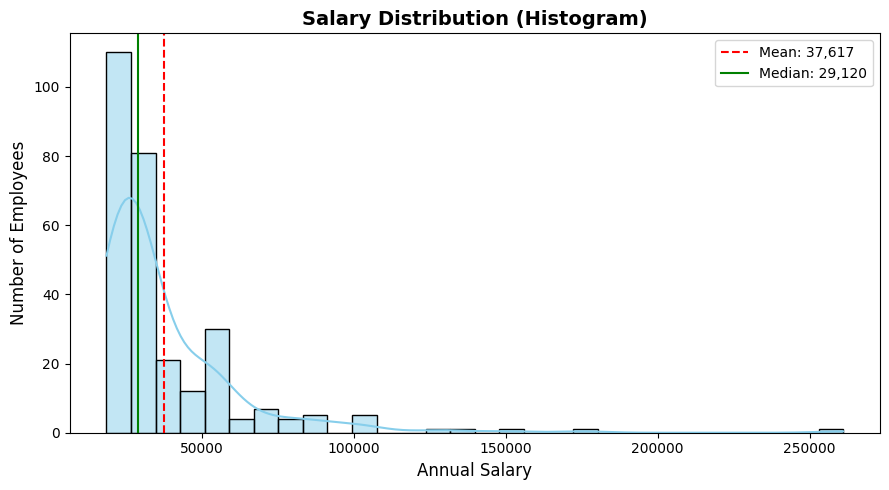

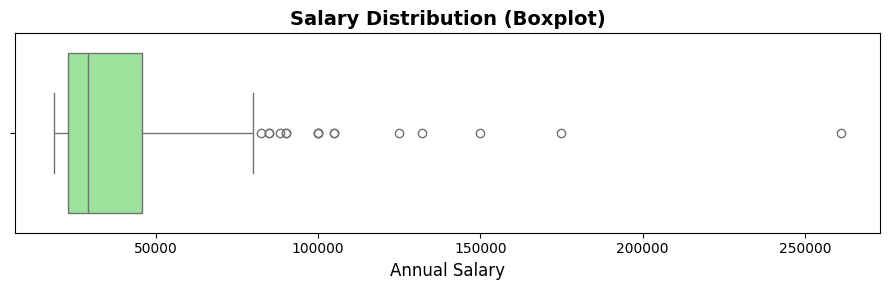

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure salaries are numeric
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# Create fig folder
os.makedirs("fig", exist_ok=True)

# --- Summary Stats ---
summary_stats = df['annualsalary'].describe(percentiles=[0.25, 0.5, 0.75])
print("📊 Salary Summary Statistics:")
print(summary_stats)

mean_salary = df['annualsalary'].mean()
median_salary = df['annualsalary'].median()

# --- Histogram: Salary Distribution ---
plt.figure(figsize=(9,5))
sns.histplot(df['annualsalary'], bins=30, kde=True, color='skyblue')

# Add mean & median lines
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_salary:,.0f}')

# Labels & legend
plt.title("Salary Distribution (Histogram)", fontsize=14, weight='bold')
plt.xlabel("Annual Salary", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig("fig/salary_distribution_histogram.png")
plt.show()

# --- Boxplot: Salary Outliers ---
plt.figure(figsize=(9,3))
sns.boxplot(x=df['annualsalary'], color='lightgreen')

# Labels
plt.title("Salary Distribution (Boxplot)", fontsize=14, weight='bold')
plt.xlabel("Annual Salary", fontsize=12)

plt.tight_layout()
plt.savefig("fig/salary_distribution_boxplot.png")
plt.show()


#### Insights

The distribution is right-skewed: most employees earn between $20K–$45K, while a few very high earners pull the mean above the median.

Outliers: Several salaries above $100K, with extreme cases reaching over $250K (visible in the boxplot).

The interquartile range (IQR) spans ~$22.8K–$45.7K, showing the bulk of employees cluster in this band.

This pattern suggests a large base of lower/mid salaries with a small group of highly paid specialists or executives.

##### 👉 In short: Salaries are concentrated at the lower end with a few high earners creating skewness, making average salary less representative than the median.

# *Salary Distribution by Gender:*
Goal---
Compare salary distribution between genders to check for imbalances and potential pay gaps.

Chart Type---
Pie chart → share of total salaries by gender.

Bar chart → average salary per employee by gender.

EDA Type---
Bivariate (gender × salaries).

Structure---
Female (F): ~$3.2M total (30.1%) | Avg salary ~$39.7K

Male (M): ~$7.5M total (69.9%) | Avg salary ~$36.8K

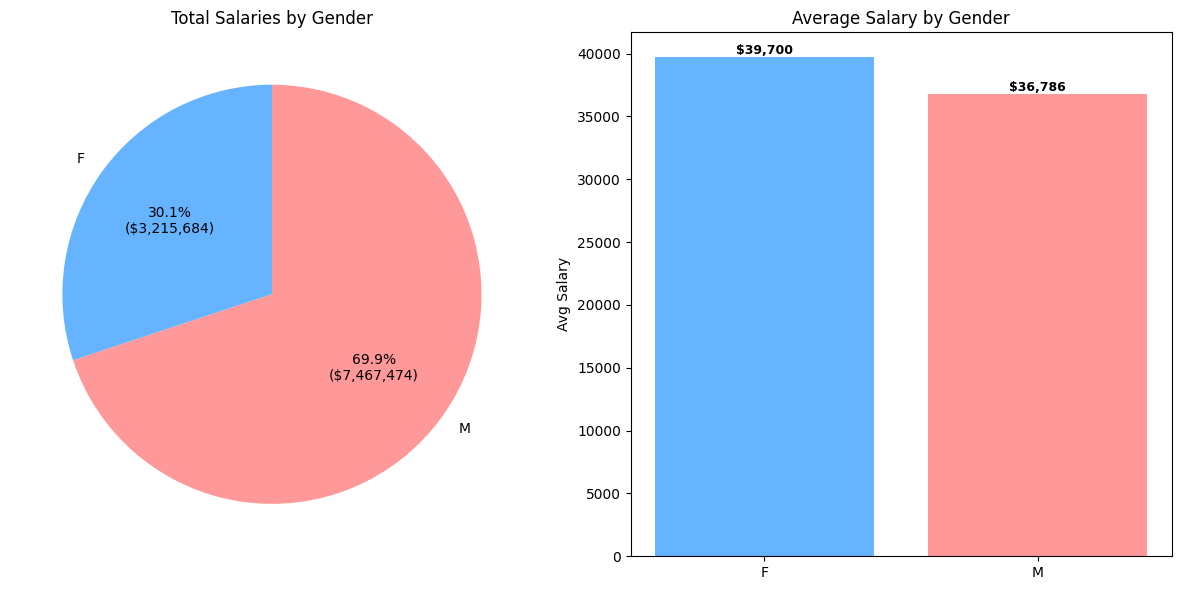

In [24]:
import os, pandas as pd, matplotlib.pyplot as plt

# numeric salary + folder
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)
os.makedirs("fig", exist_ok=True)

# aggregate
g = df.groupby('gender', as_index=False).agg(
    total_salaries=('annualsalary','sum'),
    avg_salary=('annualsalary','mean')
)

# plot
fig, ax = plt.subplots(1,2,figsize=(12,6))
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99'][:len(g)]

ax[0].pie(g.total_salaries, labels=g.gender,
          autopct=lambda p:f'{p:.1f}%\n(${p*g.total_salaries.sum()/100:,.0f})',
          startangle=90, colors=colors, textprops={'fontsize':10})
ax[0].set_title("Total Salaries by Gender")

bars = ax[1].bar(g.gender, g.avg_salary, color=colors)
for b in bars: ax[1].text(b.get_x()+b.get_width()/2, b.get_height(),
                          f"${b.get_height():,.0f}", ha='center', va='bottom', fontsize=9, weight='bold')
ax[1].set_title("Average Salary by Gender"); ax[1].set_ylabel("Avg Salary")

plt.tight_layout(); plt.savefig("fig/salary_by_gender_combined.png"); plt.show()


#### Insights

Males account for ~70% of payroll, indicating higher headcount.

Females, despite lower totals, have a higher average salary per head (~$3K more).

Suggests males dominate in numbers, but females are slightly better paid on average.

##### 👉 In simple terms: Males drive most of the salary pool due to higher headcount, but females earn more per employee.

# *Analysis for Salary vs Age:*
Goal---
Check if age (a proxy for experience) impacts employee salaries.

Chart Type---
Scatter plot with regression line (Plotly).

EDA Type---
Bivariate (age × salary).

Structure---
X-axis = Age

Y-axis = Annual Salary

Each dot = 1 employee

Regression line = overall trend

In [36]:
import os
import pandas as pd
import plotly.express as px

# Ensure birthdate is datetime and salary numeric
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)

# Calculate Age
today = pd.to_datetime("today")
df['age'] = (today.year - df['birthdate'].dt.year) - (
    (today.month < df['birthdate'].dt.month) |
    ((today.month == df['birthdate'].dt.month) & (today.day < df['birthdate'].dt.day))
)

# Create fig folder
os.makedirs("fig", exist_ok=True)

# --- Scatter Plot with Trend Line ---
fig = px.scatter(
    df,
    x="age",
    y="annualsalary",
    trendline="ols",   # ordinary least squares regression line
    opacity=0.6,
    color_discrete_sequence=['skyblue'],
    labels={
        "age": "Employee Age",
        "annualsalary": "Annual Salary"
    },
    title="Salary vs Age"
)

# Save interactive HTML and PNG
fig.write_html("fig/salary_vs_age.html")
try:
    fig.write_image("fig/salary_vs_age.png", scale=2)
except Exception as e:
    print("PNG export skipped (install kaleido). Details:", e)

fig.show()


#### Insights

The regression line slopes slightly upward, meaning salaries increase modestly with age.

Most employees cluster between ages 30–55 and $20K–50K salaries.

Several outliers earn above $100K–250K, spread across different ages.

Younger employees (30s–40s) already include some high earners → not strictly seniority-based.

At older ages (60+), salaries flatten, suggesting experience isn’t strongly rewarded after a point.

##### 👉 In short: Age has only a weak positive effect on salaries. Most employees are mid-range, with a few high-earning outliers breaking the pattern.

# *Workforce Composition Analysis*
Goal---
Understand how employees are distributed across states, genders, and departments to detect imbalances.

Chart Type---
Stacked bar (State × Gender)

Donut (Overall Gender Mix)---
Stacked bar (Department × Gender)

EDA Type---
Multivariate categorical analysis.

In [43]:
import os, pandas as pd, plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Aggregations ---
state_gender = df.groupby(['stateprovince','gender']).size().reset_index(name='count')
gender_counts = df['gender'].value_counts()
dept_counts = df['departmentname'].value_counts()

# collapse departments into top 8 + "Other"
if len(dept_counts) > 8:
    other = pd.Series({'Other': dept_counts.iloc[8:].sum()})
    dept_counts = pd.concat([dept_counts.head(8), other])

# --- Build subplots (bottom pie centered) ---
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type":"xy"}, {"type":"domain"}],
           [{"type":"domain","colspan":2}, None]],
    column_widths=[0.65, 0.35],
    row_heights=[0.45, 0.55],
    subplot_titles=("Headcount by State (Stacked by Gender)",
                    "Overall Gender Composition",
                    "Headcount by Department (Pie)")
)

# 1. State stacked bar (with labels)
for g in state_gender['gender'].unique():
    sub = state_gender[state_gender['gender']==g]
    fig.add_trace(go.Bar(
        x=sub['stateprovince'], y=sub['count'], name=g,
        text=sub['count'], textposition='inside'
    ), row=1, col=1)

# 2. Gender donut — labels forced inside the donut
fig.add_trace(go.Pie(
    labels=gender_counts.index, values=gender_counts.values,
    hole=.5,
    textinfo='label+percent+value',
    textposition='inside',                 # <-- labels inside
    insidetextorientation='radial',        # neat radial orientation
    textfont=dict(size=12),
    hovertemplate='%{label}: %{value} employees<extra></extra>'
), row=1, col=2)

# 3. Department pie (bottom middle, spanning 2 cols)
fig.add_trace(go.Pie(
    labels=dept_counts.index, values=dept_counts.values,
    hole=.45, textinfo='label+percent+value',
    hovertemplate='%{label}: %{value} employees<extra></extra>'
), row=2, col=1)

# --- Layout polish ---
fig.update_layout(
    title="Workforce Composition (States • Gender • Departments)",
    title_x=0.5,
    legend_title_text="Gender",
    barmode="stack",
    uniformtext_minsize=9, uniformtext_mode='hide',
    margin=dict(l=40, r=40, t=80, b=40),
    height=950,
    width=1050
)
fig.update_xaxes(tickangle=-30, row=1, col=1)

# --- Save ---
os.makedirs("fig", exist_ok=True)
fig.write_html("fig/workforce_composition_combined.html")
fig.write_image("fig/workforce_composition_combined.png", scale=2)

fig.show()


#### Insights

Gender mix: ~72% Male vs ~28% Female → overall imbalance.

By state: Michigan, Tennessee, and Utah have relatively higher headcounts; California and Oregon smaller. Most states are male-dominated.

By department: Production has by far the largest workforce (≈180 employees, majority male). Other departments are small and scattered.

Clear gender imbalance across nearly all departments, with males dominating especially in production-related roles.

##### 👉 In short: The workforce is heavily concentrated in Production and skewed male, with females underrepresented in most states and departments.


# *Average Annual Salary Trend Across Years*
Goal---
Track how the average annual salary has changed across hire years.

Chart Type---
Line chart with point labels.

EDA Type---
Time-series analysis (Hire Year × Salary).


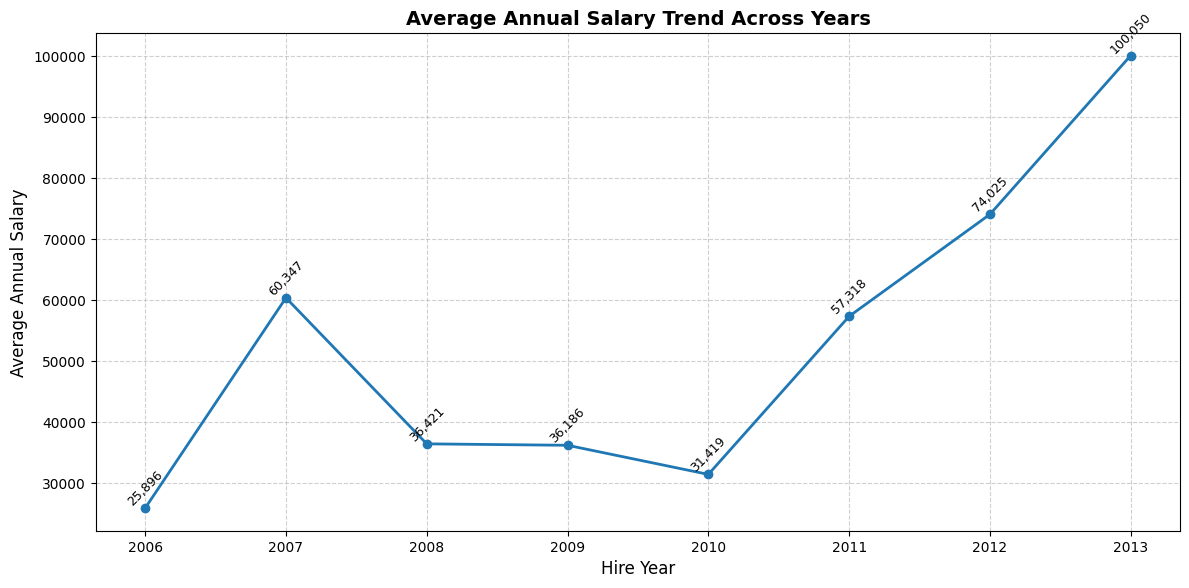

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Assuming df is already loaded ---
# Convert hiredate to datetime
df['hiredate'] = pd.to_datetime(df['hiredate'])

# Extract year from hiredate
df['hire_year'] = df['hiredate'].dt.year

# Group by hire year and calculate average salary
salary_trend = df.groupby('hire_year')['annualsalary'].mean().reset_index()

# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(salary_trend['hire_year'], salary_trend['annualsalary'], marker='o', linestyle='-', linewidth=2)

# Add labels to each point
for x, y in zip(salary_trend['hire_year'], salary_trend['annualsalary']):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9, rotation=45)

plt.title("Average Annual Salary Trend Across Years", fontsize=14, weight='bold')
plt.xlabel("Hire Year", fontsize=12)
plt.ylabel("Average Annual Salary", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Save the figure ---
os.makedirs("fig", exist_ok=True)  # create folder if not exists
plt.savefig("fig/salary_trend_hireyear.png", dpi=300, bbox_inches='tight')

plt.show()


#### Insights

2006–2007 → Sharp rise (from ~$26K → ~$60K).

2008–2010 → Decline and stagnation (~$31–36K range). Likely linked to the global recession period.

2011–2013 → Strong growth again, reaching ~$100K by 2013.

The trend suggests cyclical salary patterns, with downturns followed by strong rebounds.

##### 👉 In short: Salaries dipped around the 2008–2010 crisis period, then rebounded strongly, more than doubling by 2013.

# *State × Department Workforce & Salaries Heatmap*
Goal---
Show how employees and salaries are distributed across states and departments simultaneously.

Chart Type---
Heatmap (color = total salaries, numbers = headcount).

EDA Type---
Categorical cross-analysis (State × Department).

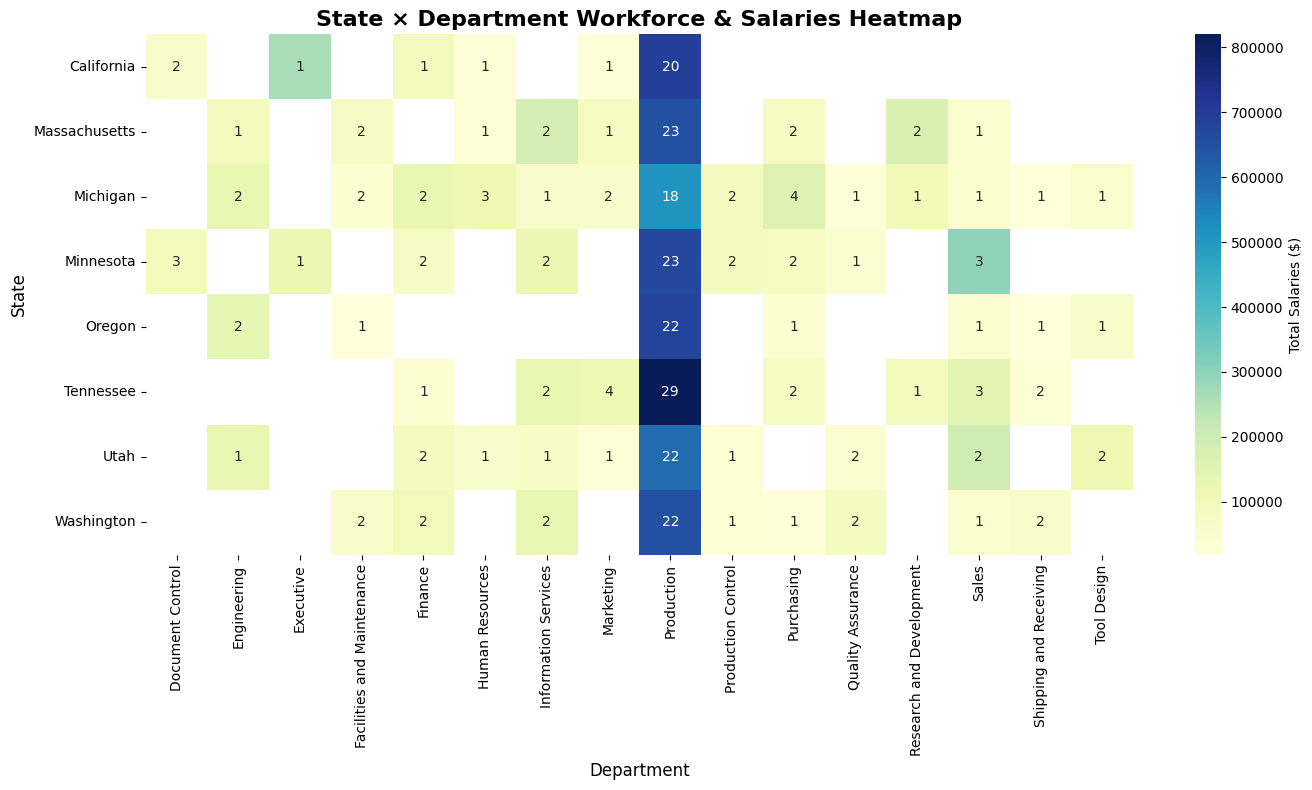

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Prep Data ---
# Group by State + Department
heatmap_data = (
    df.groupby(['stateprovince', 'departmentname'])
      .agg(
          total_salaries=('annualsalary','sum'),
          employees=('businessentityid','nunique')
      )
      .reset_index()
)

# Pivot for salaries (matrix for heatmap)
salary_matrix = heatmap_data.pivot(index='stateprovince', columns='departmentname', values='total_salaries')

# Pivot for employee counts (to annotate)
emp_matrix = heatmap_data.pivot(index='stateprovince', columns='departmentname', values='employees')

# --- Plot Heatmap ---
plt.figure(figsize=(14,8))
sns.heatmap(
    salary_matrix,
    annot=emp_matrix,        # annotate with employee counts
    fmt=".0f",               # show integers (employees)
    cmap="YlGnBu",           # blue-green colormap
    cbar_kws={'label': 'Total Salaries ($)'}
)

plt.title("State × Department Workforce & Salaries Heatmap", fontsize=16, weight='bold')
plt.xlabel("Department", fontsize=12)
plt.ylabel("State", fontsize=12)

plt.tight_layout()

# Save
os.makedirs("fig", exist_ok=True)
plt.savefig("fig/state_department_salary_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


#### Insights

Production dominates across nearly all states, with the highest salaries and headcounts (darkest cells).

States like Tennessee, Massachusetts, and Minnesota have large Production teams (~22–29 employees each).

Smaller departments (Executive, Finance, HR, Tool Design) appear scattered with 1–3 employees per state.

Some departments (Engineering, R&D, Sales) appear only in selected states, showing specialization.

California has relatively fewer employees per department compared to Midwest states like Michigan and Minnesota.

##### 👉 In short: Production is the salary and workforce powerhouse across states, while other departments remain thinly spread.

# *Correlation Heatmap Analysis:*
Goal---
Identify relationships between numeric features (salary, pay, age, etc.).

Chart Type---
Correlation heatmap (numeric features only).

EDA Type---
Multivariate correlation analysis.

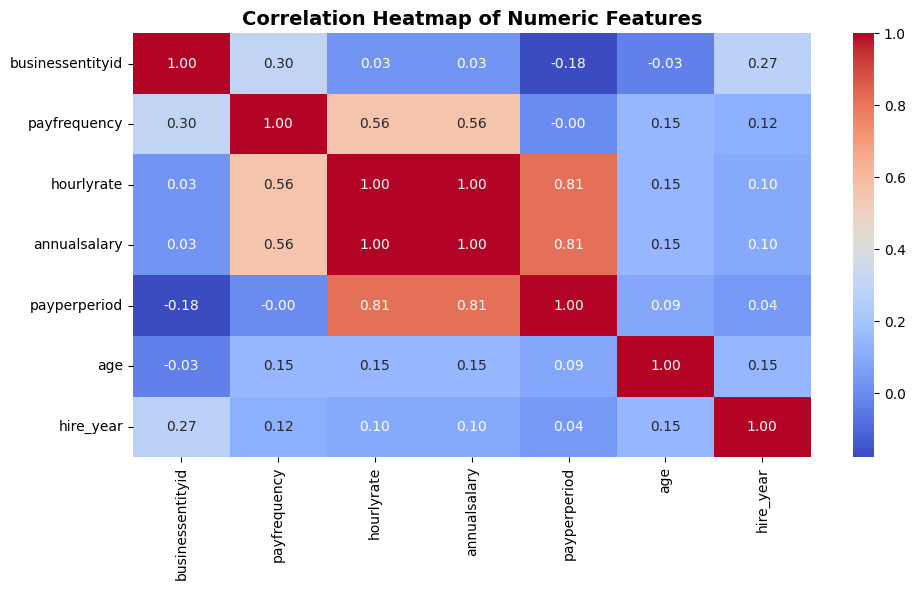

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure numeric conversions
df['annualsalary'] = pd.to_numeric(df['annualsalary'], errors='coerce').fillna(0)
df['hourlyrate'] = pd.to_numeric(df['hourlyrate'], errors='coerce').fillna(0)

# If you calculated age earlier, keep it, else compute again:
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')
today = pd.to_datetime("today")
df['age'] = (today.year - df['birthdate'].dt.year) - (
    (today.month < df['birthdate'].dt.month) |
    ((today.month == df['birthdate'].dt.month) & (today.day < df['birthdate'].dt.day))
)

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_cols.corr()

# --- Plot Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,           # show values
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color scheme
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, weight='bold')
plt.tight_layout()

# Save
os.makedirs("fig", exist_ok=True)
plt.savefig("fig/correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


#### Insights

Annual Salary ↔ Hourly Rate → perfect correlation (1.0), meaning salary is directly derived from hourly rate in your dataset.

Annual Salary / Hourly Rate ↔ Pay per Period → strong correlation (0.81) → consistent formula linking pay structures.

Annual Salary ↔ Pay Frequency → moderate correlation (0.56) → salary is somewhat dependent on pay schedule.

Age ↔ Salary → very weak correlation (~0.15) → older employees don’t necessarily earn more.

Hire Year ↔ Salary → low correlation (~0.10) → tenure isn’t a strong driver of salary here.

##### 👉 In short: Pay structure (salary, hourly rate, pay per period, pay frequency) are tightly linked. Age and hire year have little influence.